# 1.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings

## 1.1 Load data

In [3]:
# Plan 1 = Base de dados
# Plan 2 = Novas entradas

base_dado = pd.read_excel('data/BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

## 1.2 Visualize data

In [5]:
# 1 = Não usou
# 2 = Serviço
# 3 = Furto

base_dado.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [7]:
base_dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [9]:
base_dado.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


# 2.0 VIEW CHARTS

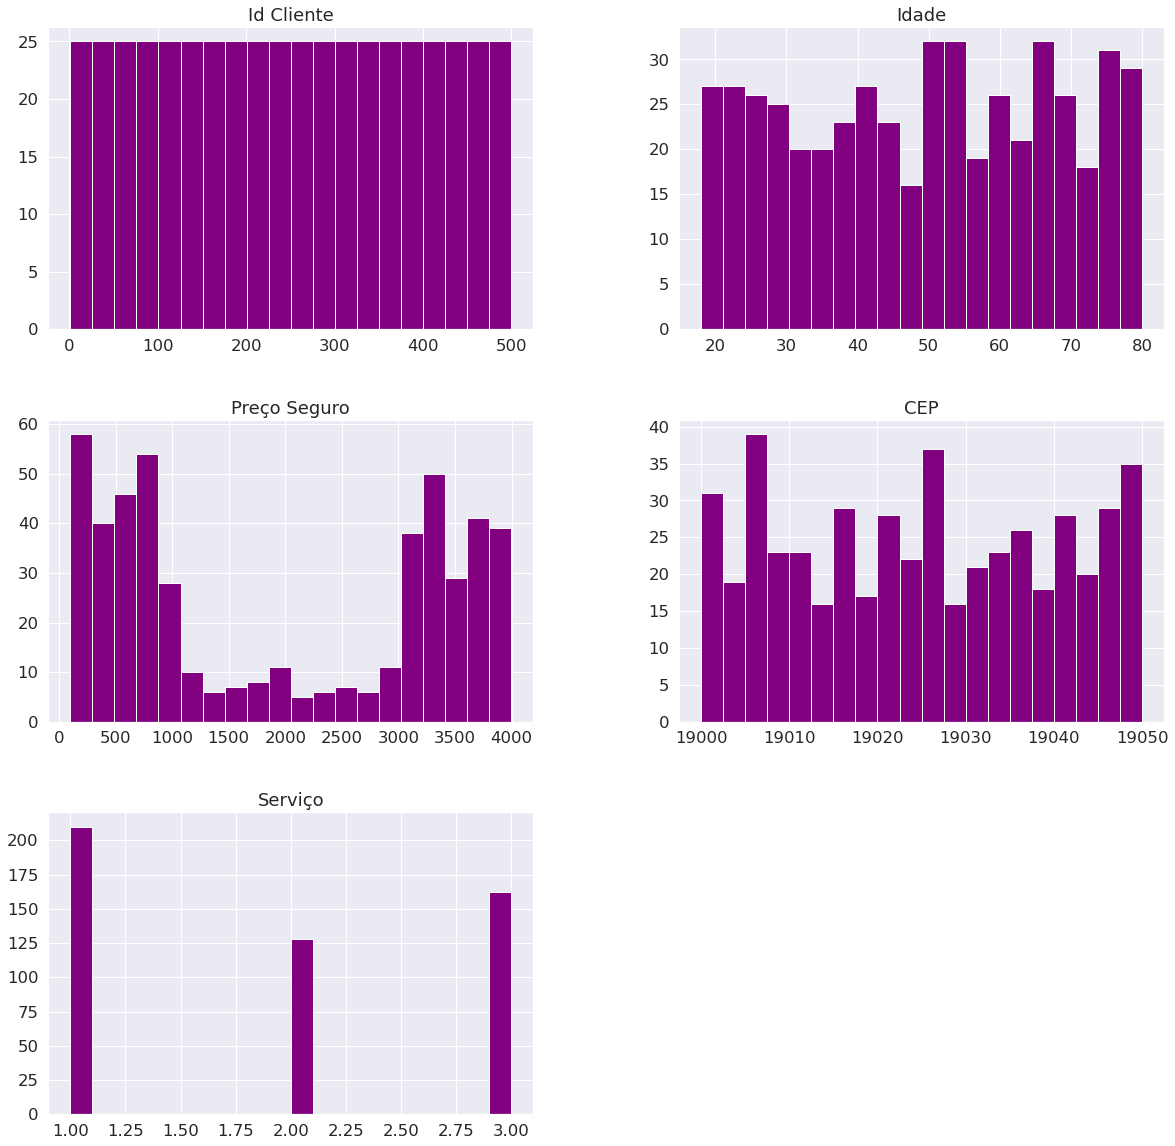

In [10]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = base_dado.hist(bins=20, color='purple')

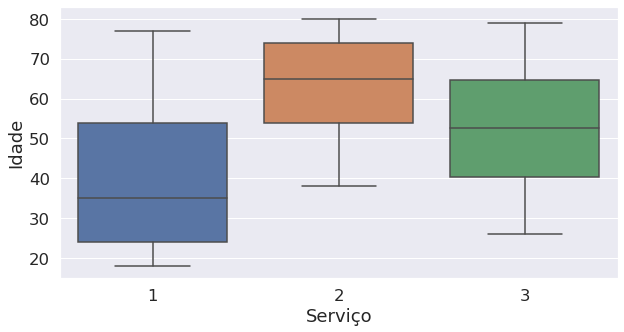

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dado, x='Serviço', y='Idade');

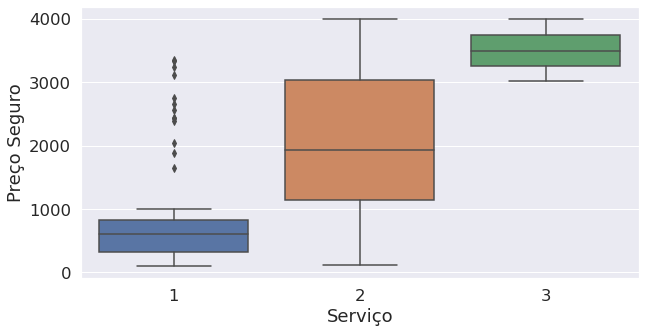

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dado, x='Serviço', y='Preço Seguro');

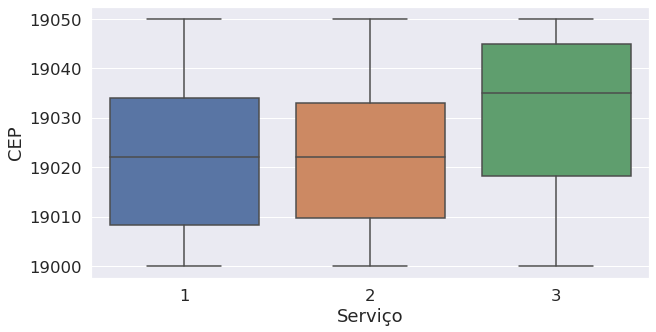

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dado, x='Serviço', y='CEP');